Доброго времени суток. 

Была поставлена задача узнать, какие факторы влияют на моральное и физическое истощение сотрудников в некоторой компании Х. С этой целью были проведены первичный EDA и числовой анализ имеющихся данных, их обработка и интерпретация, а также использован некоторый арсенал Машинного обучения. Хотя изначально идеи построить какую-то модель не было и, соответственно, не были использованы best-practices для достижения наилучших цифр, полученный результат кажется достаточно хорошим в абсолютных значениях. Все, что было проделано - под катом.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
sns.set(rc={'figure.figsize':(11, 6)})
import re

import warnings
warnings.filterwarnings("ignore")

In [2]:
whole_df = pd.read_csv('df.csv')
whole_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,2068,2,...,1,80,0,6,3,4,4,3,1,2
1,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,4,80,0,17,3,2,9,6,0,8
2,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,2,80,1,6,0,3,6,2,0,3
3,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,1,80,1,9,5,3,7,7,1,7
4,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,80,1,17,3,3,5,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,80,1,6,3,3,2,2,2,2
1466,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,80,0,8,3,3,8,7,3,0
1467,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,80,0,7,3,3,0,0,0,0
1468,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,80,1,10,3,3,10,7,1,7


**--------------------------------------------------------------**
# Data preprocessing

## Columns

* Age
* **A t t r i t i o n** (our target)
* Business travel
* Daily rate
* Department
* Distancefromhome
* Education
* Educationfiel
* Employeenumber
* Environment satisfaction
* Gender	
* HourlyRate 
* JobInvolvement 
* JobLevel	
* JobRole	
* JobSatisfaction
* MaritalStatus	
* MonthlyIncome	
* MonthlyRate	
* NumCompaniesWorked	
* Over18	
* OverTime	
* PercentSalaryHike	
* PerformanceRating	
* RelationshipSatisfaction	
* StandardHours	
* StockOptionLevel	
* TotalWorkingYears	
* TrainingTimesLastYear	
* WorkLifeBalance	
* YearsAtCompany	
* YearsInCurrentRole	
* YearsSinceLastPromotion	
* YearsWithCurrManager

In [3]:
whole_df.set_axis(['age', 'target', 'travel', 'drate', 'department', 'dist', 'education', 'field', 'id', 'envsat',
            'gender', 'hrate', 'involve', 'level', 'role', 'jobsat', 'marital', 'income',
            'mrate', 'exp', 'adult', 'overtime', 'hike', 'rating', 'relatsat', 'standhours', 'stocks',
            'total_years', 'trains', 'balance', 'years', 'curyears', 'promoyears', 'manageryears'], axis=1, 
            inplace=True)

In [4]:
df = whole_df.sample(frac = 0.8) # that is our train df
test_df = whole_df.loc[~whole_df.index.isin(df.index)]

### Age

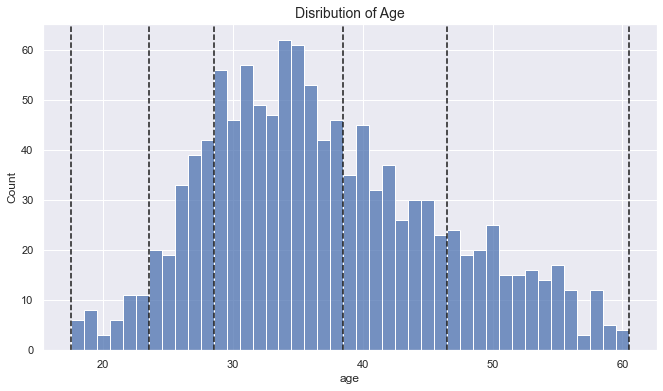

In [5]:
bins = [17, 23, 28, 38, 46, 60]
for xc in bins:
    plt.axvline(x=xc+0.5, color='k', linestyle='--')
sns.histplot(data = df[['age']], x = 'age', discrete = True)
plt.title('Disribution of Age', size = 14);

Большое количество уникальных значений лучше дискретизировать, то есть разделить на несколько интервалов. В данном случае, можно разбить на интервалы (17,23], (23, 28], (28, 38], (38, 46], (46, 60]. Данное разбиение может иметь смысл, поскольку мы не просто сгруппировали данные, но и внесли в численные значения смысл: 17-23 лет, как правило, время учебы в университете, 37-46 - самое то для кризиса среднего возраста, 46-60 - уже возрастные работники, которым может потребоваться дополнительный уход (или наоборот - высшие грейды, которые хорошо зарабатывают и думают не только о работе).

In [6]:
cats_age, bins_age = pd.cut(df.age.values, bins = bins, 
                    labels = ['1', '2', '3', '4', '5'], retbins = True)
df.age = cats_age

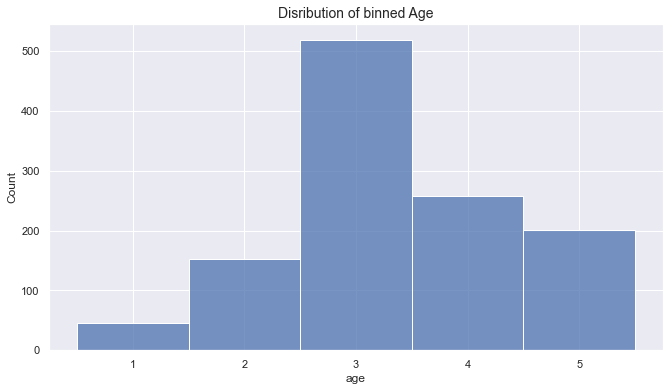

In [7]:
sns.histplot(data = df[['age']], x = 'age')
plt.title('Disribution of binned Age', size = 14);

In [8]:
stats_age = df.groupby(['age', 'target']).count().loc[:, 'travel']
stats_age_df = round(pd.DataFrame(stats_age / stats_age.groupby(level=0).sum() * 100), 2)
stats_age_df.rename({'travel':'value (%)'}, axis = 1, inplace = True)
total_age_df = pd.concat([pd.DataFrame(stats_age), stats_age_df], axis = 1)
total_age_df.rename({'travel':'value'}, axis = 1, inplace = True)
print('Pivot table of Age and Attrition')
display(total_age_df)

Pivot table of Age and Attrition


value  value (%)
age target                  
1   No         27      60.00
    Yes        18      40.00
2   No        121      79.08
    Yes        32      20.92
3   No        435      83.82
    Yes        84      16.18
4   No        228      88.37
    Yes        30      11.63
5   No        174      86.57
    Yes        27      13.43

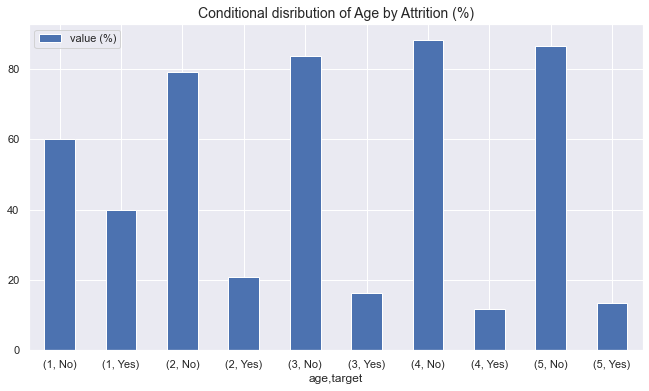

In [9]:
total_age_df.drop('value', axis = 1).plot(kind = 'bar', rot = 0);
plt.title('Conditional disribution of Age by Attrition (%)', size = 14);

Из рисунка и таблиц выше явно видно, что у молодых ребят истощение идет гораздо более серьезными темпами, чем у более возрастных сотрудников. Связано это может быть в первую очередь с тем, что молодых людей без опыта нанимают на рутинную и вызывающую трудности работу, при этом им зачастую приходится совмещать ее с учебой. И чем выше возраст, тем предположительно более высокое положение занимает сотрудник в компании, становится более ценным ее кадром, и компания старается заботиться о нем.

### Business travel

In [10]:
pd.DataFrame(df.travel)

,travel
1352,Travel_Frequently
812,Travel_Rarely
354,Travel_Rarely
774,Travel_Rarely
6,Non-Travel
...,...
531,Travel_Rarely
1168,Travel_Rarely
217,Travel_Rarely
1239,Travel_Rarely


Как минимум, нужно исключить 'Travel_' из значений поля.

In [11]:
df.travel = [word[7:] if 'Travel_' in word else word for word in df.travel]
df.travel = df.travel.astype('category')

In [12]:
stats = df.travel.value_counts().div(sum(df.travel.value_counts())) * 100
display(pd.DataFrame(data = {'Value in percentage' :
                     [''.join([str(round(value, 2)), '%']) for value in stats]},
                    index = stats.index))

,Value in percentage
Rarely,71.34%
Frequently,19.22%
Non-Travel,9.44%


In [13]:
stats_travel = df.groupby(['travel', 'target']).count().loc[:, 'age']
stats_travel_df = round(pd.DataFrame(stats_travel / stats_travel.groupby(level=0).sum() * 100), 2)
stats_travel_df.rename({'age':'value (%)'}, axis = 1, inplace = True)
total_travel_df = pd.concat([pd.DataFrame(stats_travel), stats_travel_df], axis = 1)
total_travel_df.rename({'age':'value'}, axis = 1, inplace = True)
print('Pivot table of Travel and Attrition')
display(total_travel_df)

Pivot table of Travel and Attrition


value  value (%)
travel     target                  
Frequently No        171      75.66
           Yes        55      24.34
Non-Travel No        100      90.09
           Yes        11       9.91
Rarely     No        714      85.10
           Yes       125      14.90

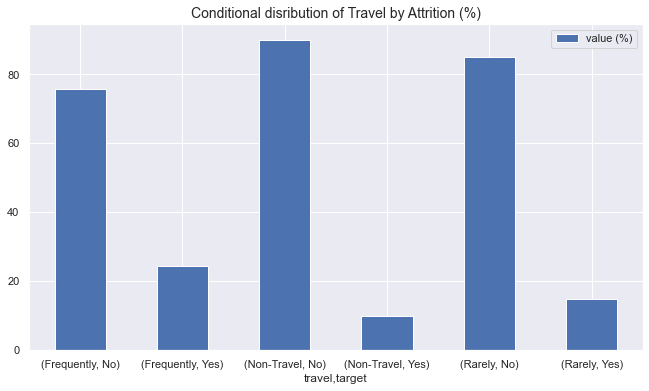

In [14]:
stats_travel_df.plot(kind = 'bar', rot = 0)
plt.title('Conditional disribution of Travel by Attrition (%)', size = 14);

Промежуточный вывод: командировки причиняют дискомфорт. Видимо не всем сотрудникам нравятся частые путешествия по работе.

### Daily rate

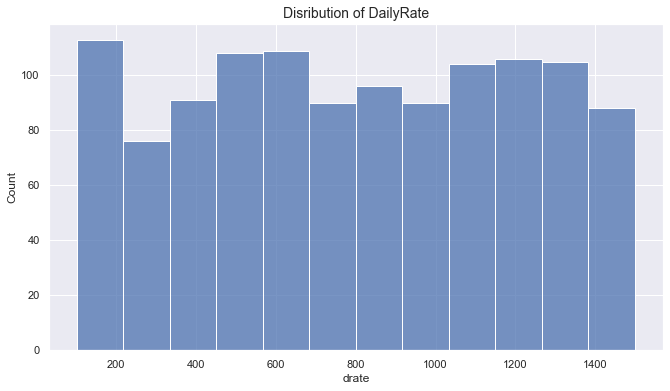

In [15]:
sns.histplot(data = df[['drate']], x = 'drate')
plt.title('Disribution of DailyRate', size = 14);

Похоже на достаточно равномерное распределение.

In [16]:
# df.drate = pd.qcut(df.drate, q = 4, labels = [0, 1, 2, 3]).astype('int')
# df.drate.value_counts()

Есть некоторая проблема в том, что я не знаю логику, которая стоит за столбцами 'daily rate', 'hour rate' и 'month rate', а также связи между этими столбцами с полем 'monthly income'. Если под 'daily rate' понимается заработок за день, то как тогда соотносятся 'monthly rate' и 'monthly income'? Или 'daily rate' означает зарплату за одну дневную ставку? В действительности я бы обратился к знающим коллегам или к бизнес-пользователям бд, которые бы смогли мне объяснить логику этих полей в этой таблице, но поскольку я это сделать не могу в текущей ситуации, то тут есть два "путя":
1. "Дропнуть" все эти столбцы
2. Пройтись лассо-регрессией, оставив столбцы на месте. <br>

В любом случае оставить все 3 столбца 'DailyRate', 'HourlyRate' и 'MonthlyRate' я не могу, потому что они должно быть линейно связаны (см. рисунки ниже - небольшая дисперсия у распределений, концентрация у определенных значений), и это может дать нам проблему 'near multicollinearity', из-за чего мы получим некорректные оценки коэффициентов.<br>

**Поэтому 'hour rate' и 'monthly rate' будут убраны из датасета, при этом останется 'daily rate'.**

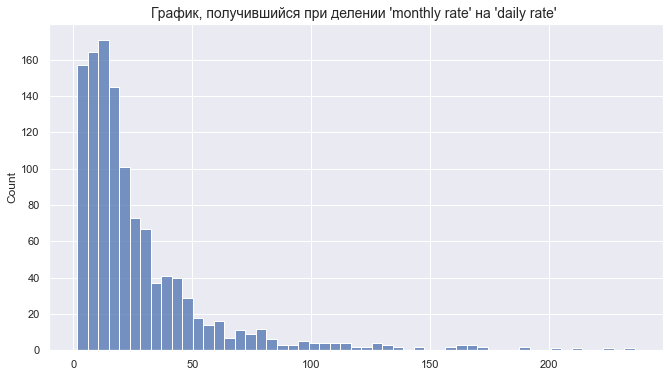

In [17]:
sns.histplot(data = (df.mrate/df.drate))
plt.title('График, получившийся при делении \'monthly rate\' на \'daily rate\' ', size = 14);

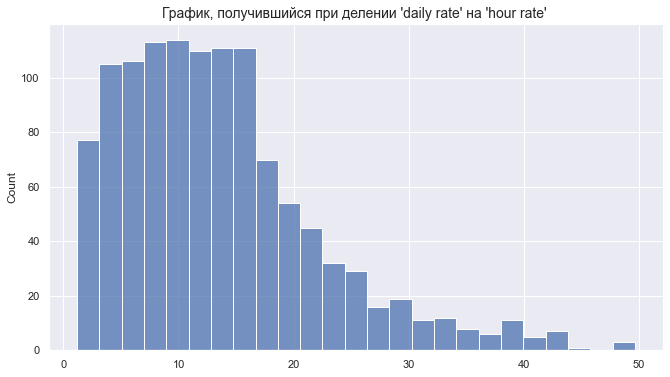

In [18]:
sns.histplot(data = (df.drate/df.hrate))
plt.title('График, получившийся при делении \'daily rate\' на \'hour rate\' ', size = 14);

In [19]:
df.drop(['hrate', 'mrate'], axis = 1, inplace = True)

### Department

In [20]:
stats_dep = df.groupby(['department', 'target']).count().loc[:, 'age']
stats_dep_df = round(pd.DataFrame(stats_dep / stats_dep.groupby(level=0).sum() * 100), 2)
stats_dep_df.rename({'age':'value (%)'}, axis = 1, inplace = True)
total_dep_df = pd.concat([pd.DataFrame(stats_dep), stats_dep_df], axis = 1)
total_dep_df.rename({'age':'value'}, axis = 1, inplace = True)
print('Pivot table of Department and Attrition')
display(total_dep_df)

Pivot table of Department and Attrition


value  value (%)
department             target                  
Human Resources        No         45      81.82
                       Yes        10      18.18
Research & Development No        657      85.88
                       Yes       108      14.12
Sales                  No        283      79.49
                       Yes        73      20.51

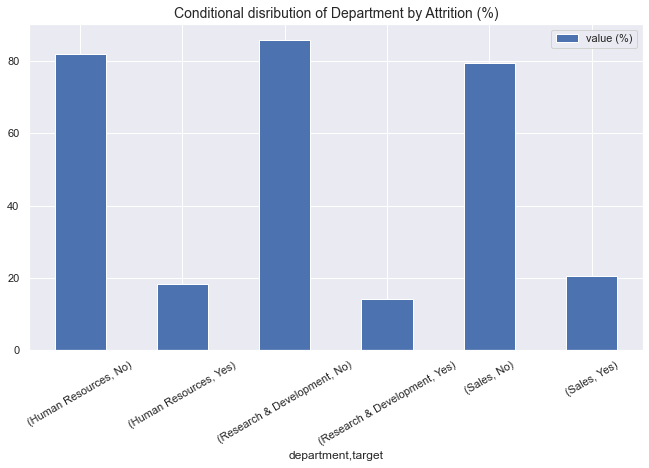

In [21]:
total_dep_df.drop('value', axis = 1).plot(kind = 'bar', rot = 30);
plt.title('Conditional disribution of Department by Attrition (%)', size = 14);

Мы видим разницу в 7 процентов выгоревших сотрудников у разных департаментов (R&D и Sales). Вообще говоря, 7% - это достаточно много, особенно когда речь идет о большой компании с сотнями сотрудников. Но на самом деле это достаточно отдаленное приближение, и лучше всего посмотреть по отделам, чем мы займемся далее.

### Distance from home

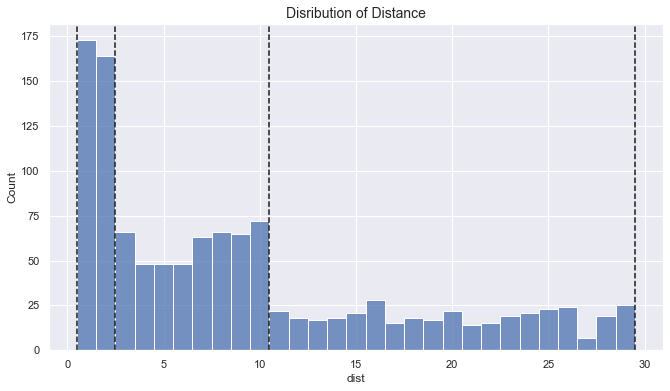

In [22]:
bins = [0, 2, 10, 29]
for xc in bins:
    plt.axvline(x=xc+0.5, color='k', linestyle='--')
sns.histplot(data = df.dist, discrete = True)
plt.title('Disribution of Distance', size = 14);

Также, как и в случае с возрастом, разобьем весь интервал данных на "близко", "средне", "далеко", что, соответственно, будет (0,2], (2,10], (10, 29] или '1', '2', '3'.

In [23]:
cats_dist, bins_dist = pd.cut(df.dist.values, bins = bins, 
                    labels = ['1', '2', '3'], retbins = True)
df.dist = cats_dist

In [24]:
stats_dist = df.groupby(['dist', 'target']).count().loc[:, 'age']
stats_dist_df = round(pd.DataFrame(stats_dist / stats_dist.groupby(level=0).sum() * 100), 2)
stats_dist_df.rename({'age':'value (%)'}, axis = 1, inplace = True)
total_dist_df = pd.concat([pd.DataFrame(stats_dist), stats_dist_df], axis = 1)
total_dist_df.rename({'age':'value'}, axis = 1, inplace = True)
print('Pivot table of Department and Attrition')
display(total_dist_df)

Pivot table of Department and Attrition


value  value (%)
dist target                  
1    No        292      86.65
     Yes        45      13.35
2    No        406      85.29
     Yes        70      14.71
3    No        287      79.06
     Yes        76      20.94

Из таблицы видно, что, чем дальше от дома живет сотрудник, тем заметнее ухудшение его морального состояния. Скорее всего это больше аффектит нижние грейды по типу стажеров, которые не могут позволить себе быть привередливыми в плане места работы, и, соответственно, могут ездить на работу по несколько часов. В действительности это вряд ли положительно влияет на их самочувствие.

### Education

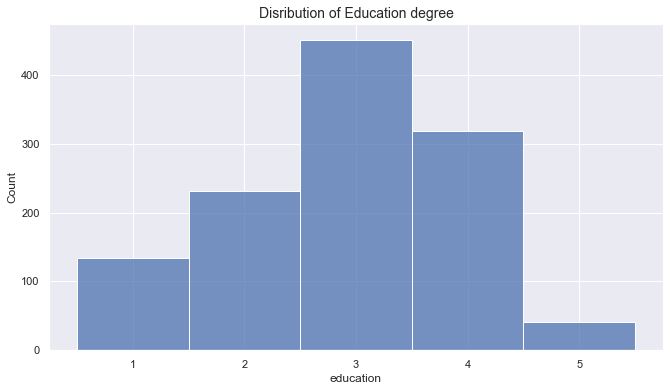

In [25]:
sns.histplot(data = df[['education']], x = 'education', discrete = True)
plt.title('Disribution of Education degree', size = 14);

In [26]:
stats_education = df.groupby(['education', 'target']).count().loc[:, 'age']
stats_education_df = round(pd.DataFrame(stats_education / stats_education.groupby(level=0).sum() * 100), 2)
stats_education_df.rename({'age':'value (%)'}, axis = 1, inplace = True)
total_education_df = pd.concat([pd.DataFrame(stats_education), stats_education_df], axis = 1)
total_education_df.rename({'age':'value'}, axis = 1, inplace = True)
print('Pivot table of Department and Attrition')
display(total_education_df)

Pivot table of Department and Attrition


value  value (%)
education target                  
1         No        113      84.33
          Yes        21      15.67
2         No        194      83.98
          Yes        37      16.02
3         No        372      82.48
          Yes        79      17.52
4         No        270      84.64
          Yes        49      15.36
5         No         36      87.80
          Yes         5      12.20

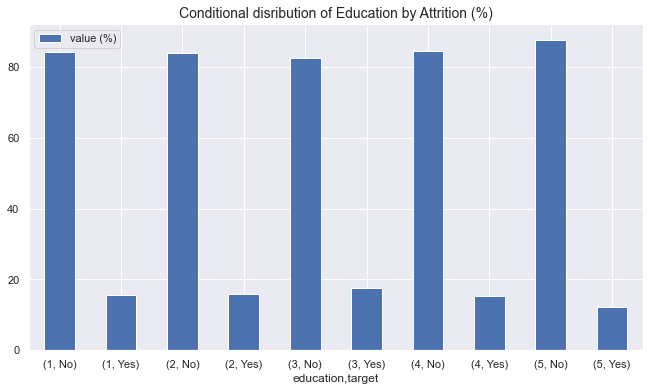

In [27]:
total_education_df.drop('value', axis = 1).plot(kind = 'bar', rot = 0)
plt.title('Conditional disribution of Education by Attrition (%)', size = 14);

Переменная Education должна влиять на переменную Attrition только косвенно. Да, по идее, кандидаты и доктора наук должны работать в более благоприятных условиях, чем стажеры и джуниоры, но из рисунка и таблицы выше можно заметить, что существенной разницы между людьми с разными уровнями образования нет (хотя стоит заметить, что бакалавры (группа 3) чаще выгорают, чем остальные - скорее всего это связано с совмещением учебы и трудностями молодой жизни). При этом данный столбец явно будет коррелировать со столбцом Age. Я подумал, что будет лучше в таком случае **столбец Education убрать**.

(очень спорный момент, и, конечно, может подлежать дискуссии)

In [28]:
df.drop('education', axis = 1, inplace = True)

### Education field

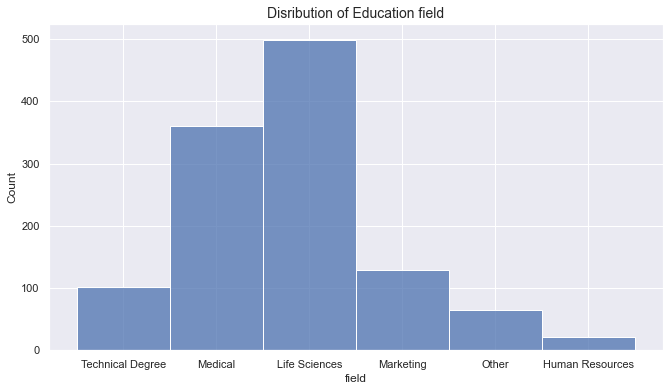

In [29]:
sns.histplot(data = df[['field']], x = 'field', discrete = True)
plt.title('Disribution of Education field', size = 14);

In [30]:
stats_field = df.groupby(['field', 'target']).count().loc[:, 'age']
stats_field_df = round(pd.DataFrame(stats_field / stats_field.groupby(level=0).sum() * 100), 2)
stats_field_df.rename({'age':'value (%)'}, axis = 1, inplace = True)
total_field_df = pd.concat([pd.DataFrame(stats_field), stats_field_df], axis = 1)
total_field_df.rename({'age':'value'}, axis = 1, inplace = True)
print('Pivot table of Department and Attrition')
display(total_field_df)

Pivot table of Department and Attrition


value  value (%)
field            target                  
Human Resources  No         17      77.27
                 Yes         5      22.73
Life Sciences    No        426      85.37
                 Yes        73      14.63
Marketing        No        101      78.29
                 Yes        28      21.71
Medical          No        306      85.00
                 Yes        54      15.00
Other            No         56      86.15
                 Yes         9      13.85
Technical Degree No         79      78.22
                 Yes        22      21.78

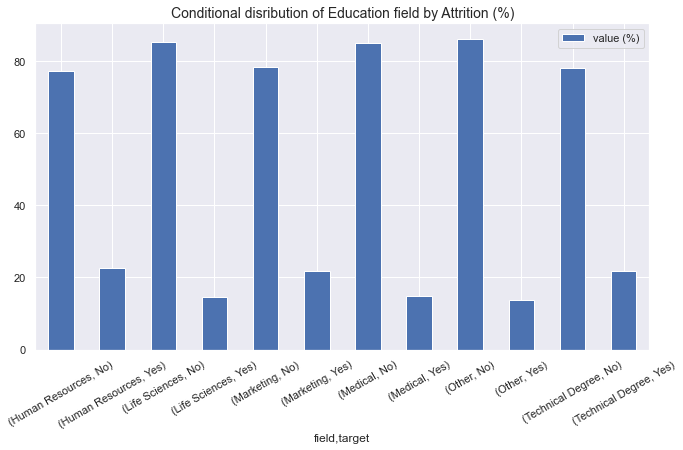

In [31]:
total_field_df.drop('value', axis = 1).plot(kind = 'bar', rot = 30);
plt.title('Conditional disribution of Education field by Attrition (%)', size = 14);

Понятно, что внутри департамента R&D существует много отделов (Technical Degree, Medical, etc.). Из графика и таблицы выше, можно заметить, что у отдела технической специальности заметно больше истощенных людей, в то время как у "медиков" в этом плане дела лучше (на 11%) (не говорим про Human Resources, потому что данных мало, но проблема по цифрам хуже всего именно там). Возможно данную информацию можно было бы использовать для того, чтобы (об этом пишут братья Хизы в своей книге "Ловушки мышления") высший менеджмент мог поговорить с руководителями отделов, которые успешно справляются с данной проблемой, на эту тему и вычленить необходимую для компании информацию.

### Employee number
Уникальный номер каждого сотрудника, не нужен для анализа.

In [32]:
df.drop('id', axis = 1, inplace = True)

### Environment satisfaction

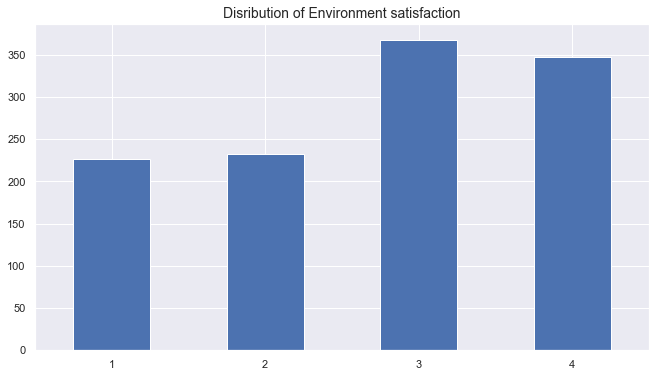

In [33]:
df.envsat.value_counts().sort_index().plot(kind = 'bar', rot = 0);
plt.title('Disribution of Environment satisfaction', size = 14);

In [34]:
stats_envsat = df.groupby(['envsat', 'target']).count().loc[:, 'travel']
stats_envsat_df = round(pd.DataFrame(stats_envsat / stats_envsat.groupby(level=0).sum() * 100), 2)
stats_envsat_df.rename({'travel':'value (%)'}, axis = 1, inplace = True)
total_envsat_df = pd.concat([pd.DataFrame(stats_envsat), stats_envsat_df], axis = 1)
total_envsat_df.rename({'travel':'value'}, axis = 1, inplace = True)
print('Pivot table of Environment satisfaction and Attrition')
display(total_envsat_df)

Pivot table of Environment satisfaction and Attrition


value  value (%)
envsat target                  
1      No        169      74.45
       Yes        58      25.55
2      No        197      84.55
       Yes        36      15.45
3      No        319      86.68
       Yes        49      13.32
4      No        300      86.21
       Yes        48      13.79

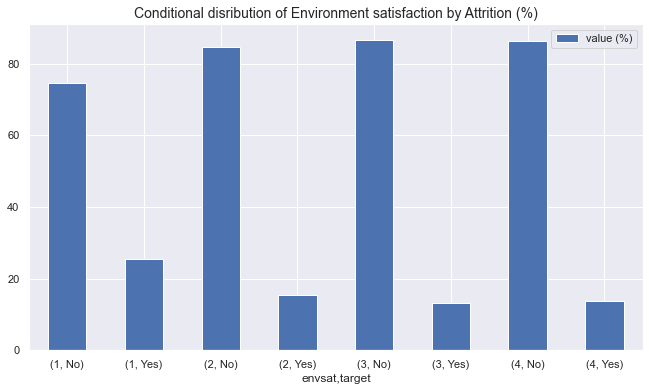

In [35]:
total_envsat_df.drop('value', axis = 1).plot(kind = 'bar', rot = 0);
plt.title('Conditional disribution of Environment satisfaction by Attrition (%)', size = 14);

Что интересно:
* Исходя из первой картинки количество людей, которым условия окружающей среды "не понравились совсем" (назовем их 1 или "единичками"), примерно равно количеству человек, которым окружающая среда "скорее не понравилась" (двойки). Аналогично с тройками и четверками. Видимо у компании есть разные филиалы (возможно, что 2), и у одного из них окружающая среда существенно лучше, чем у другого.
* Даже если не учитывать это предположение: единички, будучи чувствительными к окружающей среде (как правило, те, кто реагируют крайними оценками, более чувствительны к объекту вопроса), больше других выгорают на работе в относительной оценке (25% против ~14% у всех остальных групп). Возможно, компании стоит подумать на этот счет. Например, улучшить экологическую обстановку своими силами или готовить кандидатов заранее к таким моментам)) 
* Остальные же работники относятся к окружающей среде одинаковыым образом, то есть переменная на них не влияет.

Поскольку относительно выгорания на работе двойки, тройки и четверки равнодушны, есть смысл объединить их в одну группу.

In [36]:
df.envsat[df.envsat == 1] = 0
df.envsat[[any([value == 2, value == 3, value == 4]) for value in df.envsat]] = 1
df.envsat = df.envsat.astype('category')

### Gender

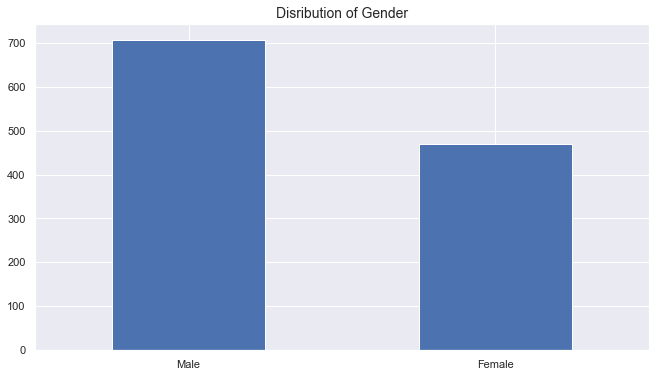

In [37]:
df.gender.value_counts().plot(kind = 'bar', rot = 0)
plt.title('Disribution of Gender', size = 14);

In [38]:
stats_gender = df.groupby(['gender', 'target']).count().loc[:, 'travel']
stats_gender_df = round(pd.DataFrame(stats_gender / stats_gender.groupby(level=0).sum() * 100), 2)
stats_gender_df.rename({'travel':'value (%)'}, axis = 1, inplace = True)
total_gender_df = pd.concat([pd.DataFrame(stats_gender), stats_gender_df], axis = 1)
total_gender_df.rename({'travel':'value'}, axis = 1, inplace = True)
print('Pivot table of Gender and Attrition')
display(total_gender_df)

Pivot table of Gender and Attrition


value  value (%)
gender target                  
Female No        400      85.29
       Yes        69      14.71
Male   No        585      82.74
       Yes       122      17.26

В общем и целом, что мужчины, что женщины примерно одинаково морально устойчивы (судя по таблице выше), поэтому пользы в себе этот столбец не несет.

(опять же спорный момент, как и с education)

In [39]:
df.drop('gender', axis = 1, inplace=True)

### Job involvement

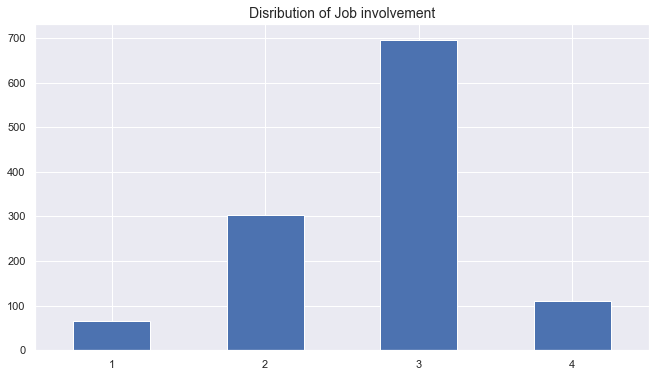

In [40]:
df.involve.value_counts().sort_index().plot(kind = 'bar', rot = 0)
plt.title('Disribution of Job involvement', size = 14);

In [41]:
stats_involve = df.groupby(['involve', 'target']).count().loc[:, 'travel']
stats_involve_df = round(pd.DataFrame(stats_involve / stats_involve.groupby(level=0).sum() * 100), 2)
stats_involve_df.rename({'travel':'value (%)'}, axis = 1, inplace = True)
total_involve_df = pd.concat([pd.DataFrame(stats_involve), stats_involve_df], axis = 1)
total_involve_df.rename({'travel':'value'}, axis = 1, inplace = True)
print('Pivot table of Job involvement and Attrition')
display(total_involve_df)

Pivot table of Job involvement and Attrition


value  value (%)
involve target                  
1       No         43      65.15
        Yes        23      34.85
2       No        246      80.92
        Yes        58      19.08
3       No        594      85.34
        Yes       102      14.66
4       No        102      92.73
        Yes         8       7.27

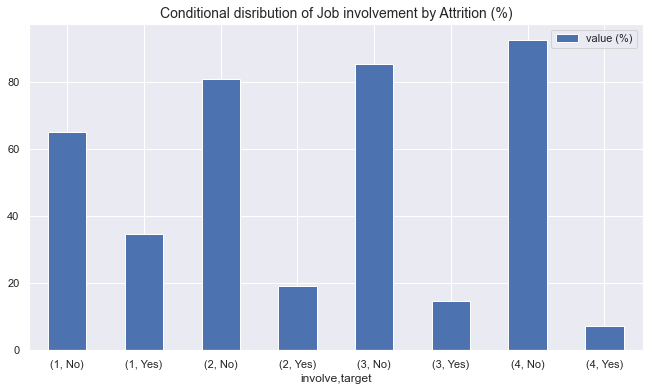

In [42]:
total_involve_df.drop('value', axis = 1).plot(kind = 'bar', rot = 0)
plt.title('Conditional disribution of Job involvement by Attrition (%)', size = 14);

Логика совпадает с цифрами: чем больше вовлеченность, тем меньше шанс выгорания. В таком случае возможно HR отделу помимо мониторинга существующих людей стоит в процессе найма отдельно разговаривать с кандидатом касательно того, что ему интересно в работе и для чего он устраивается на данную позицию. Предположительно более тщательный отбор поможет изменить количество невовлеченных сотрудников в меньшую сторону (что уже хорошо), а, соответственно, и процент истощенных работой.

### Job level

In [43]:
pd.DataFrame(df.level.value_counts())

,level
2,440
1,427
3,173
4,87
5,49


Я так понимаю, это про иерархическую стурктуру внутри компании: начиная с офисных клерков, заканчивая топ-менеджментом (картинка ниже это подтверждает).

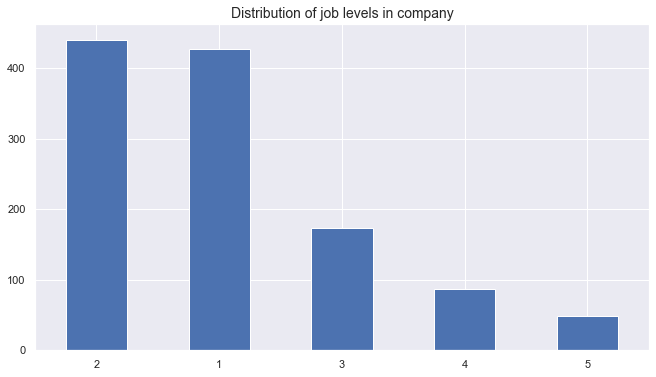

In [44]:
df.level.value_counts().plot(kind = 'bar', rot=0);
plt.title('Distribution of job levels in company', size = 14);

In [45]:
stats_level = df.groupby(['level', 'target']).count().loc[:, 'travel']
stats_level_df = round(pd.DataFrame(stats_level / stats_level.groupby(level=0).sum() * 100), 2)
stats_level_df.rename({'travel':'value (%)'}, axis = 1, inplace = True)
total_level_df = pd.concat([pd.DataFrame(stats_level), stats_level_df], axis = 1)
total_level_df.rename({'travel':'value'}, axis = 1, inplace = True)
print('Pivot table of Job level and Attrition')
display(total_level_df)

Pivot table of Job level and Attrition


value  value (%)
level target                  
1     No        317      74.24
      Yes       110      25.76
2     No        396      90.00
      Yes        44      10.00
3     No        144      83.24
      Yes        29      16.76
4     No         83      95.40
      Yes         4       4.60
5     No         45      91.84
      Yes         4       8.16

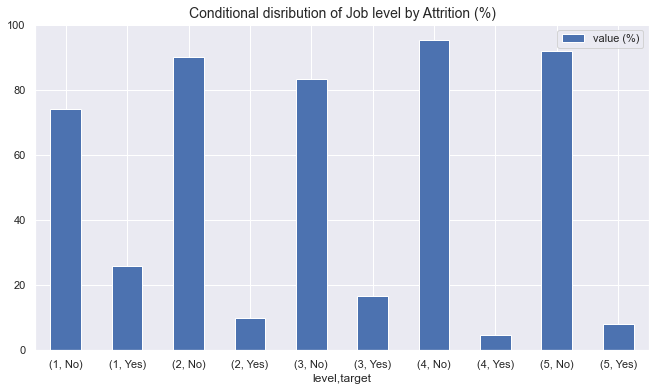

In [46]:
total_level_df.drop('value', axis = 1).plot(kind = 'bar', rot = 0)
plt.title('Conditional disribution of Job level by Attrition (%)', size = 14);

Больше всего от морального истощения страдают низшие грейды и средние (1 и 3):
* Низшие, потому что занимаются самой рутинной и черновой работой;
* Средние, потому что являются менеджментом начального уровня, и соответственно проекты по типу "вот задача, дедлайн вчера" кладутся, как правило, на их плечи. Не выполнить такую работу зачастую нельзя ("это очень срочно", "это очень важно", ну и незаменимых нет), а выполнение подобных проектов ведет к изматыванию этих сотрудников.

### Job role

In [47]:
pd.DataFrame(df.role.value_counts())

,role
Sales Executive,273
Research Scientist,234
Laboratory Technician,205
Manufacturing Director,115
Healthcare Representative,109
Manager,75
Research Director,62
Sales Representative,57
Human Resources,46


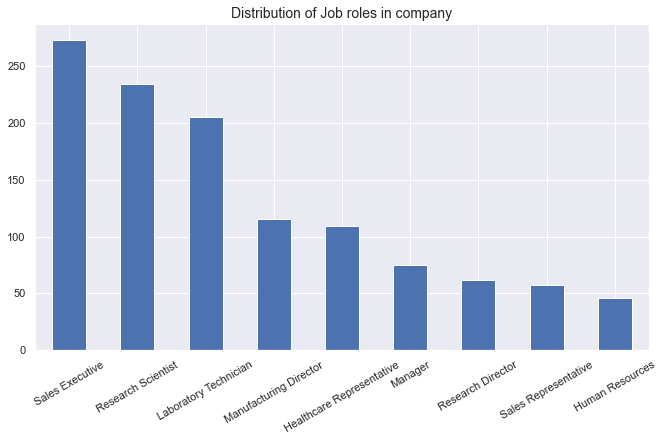

In [48]:
df.role.value_counts().plot(kind = 'bar', rot=30);
plt.title('Distribution of Job roles in company', size = 14);

In [49]:
stats_role = df.groupby(['role', 'target']).count().loc[:, 'travel']
stats_role_df = round(pd.DataFrame(stats_role / stats_role.groupby(level=0).sum() * 100), 2)
stats_role_df.rename({'travel':'value (%)'}, axis = 1, inplace = True)
total_role_df = pd.concat([pd.DataFrame(stats_role), stats_role_df], axis = 1)
total_role_df.rename({'travel':'value'}, axis = 1, inplace = True)
print('Pivot table of Job role and Attrition')
display(total_role_df)

Pivot table of Job role and Attrition


value  value (%)
role                      target                  
Healthcare Representative No        100      91.74
                          Yes         9       8.26
Human Resources           No         36      78.26
                          Yes        10      21.74
Laboratory Technician     No        155      75.61
                          Yes        50      24.39
Manager                   No         72      96.00
                          Yes         3       4.00
Manufacturing Director    No        107      93.04
                          Yes         8       6.96
Research Director         No         60      96.77
                          Yes         2       3.23
Research Scientist        No        197      84.19
                          Yes        37      15.81
Sales Executive           No        224      82.05
                          Yes        49      17.95
Sales Representative      No         34      59.65
                          Yes        23      40.35

У нас выделяются три проблемных должности: Human Resources, Laboratory Technician и хуже всех у Sales Representative. Построим статистику по каждым из них: сводную таблицу по двум столбцам Job satisfaction и Attrition.

Sales Representative


value  value (%)
jobsat target                  
1      No          2      28.57
       Yes         5      71.43
2      No          7      53.85
       Yes         6      46.15
3      No         14      63.64
       Yes         8      36.36
4      No         11      73.33
       Yes         4      26.67

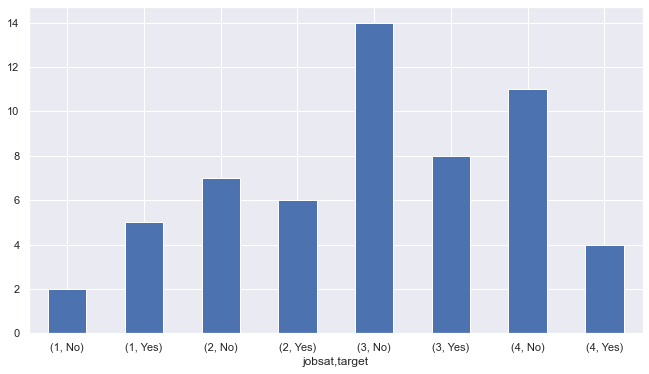

In [50]:
df1 = df.loc[df.role == 'Sales Representative', :]
stats_involve = df1.groupby(['jobsat', 'target']).count().loc[:, 'travel']
stats_involve_df = round(pd.DataFrame(stats_involve / stats_involve.groupby(level=0).sum() * 100), 2)
stats_involve_df.rename({'travel':'value (%)'}, axis = 1, inplace = True)
total_involve_df = pd.concat([pd.DataFrame(stats_involve), stats_involve_df], axis = 1)
total_involve_df.rename({'travel':'value'}, axis = 1, inplace = True)
print('Sales Representative')
display(total_involve_df)
df1.groupby(['jobsat', 'target']).count().loc[:, 'age'].plot(kind = 'bar', rot = 0);

Human Resources


value  value (%)
jobsat target                  
1      No          4      50.00
       Yes         4      50.00
2      No         11      84.62
       Yes         2      15.38
3      No         10      83.33
       Yes         2      16.67
4      No         11      84.62
       Yes         2      15.38

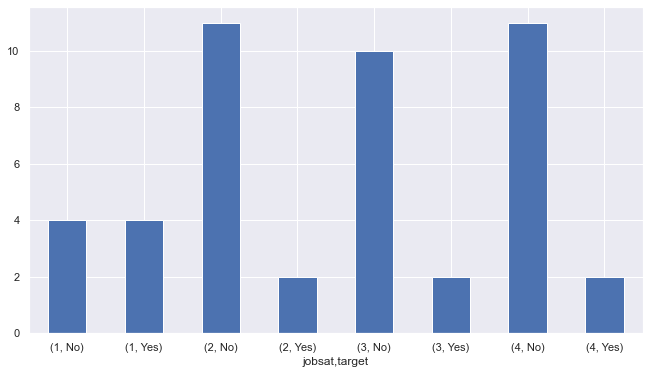

In [51]:
df1 = df.loc[df.role == 'Human Resources', :]
stats_involve = df1.groupby(['jobsat', 'target']).count().loc[:, 'travel']
stats_involve_df = round(pd.DataFrame(stats_involve / stats_involve.groupby(level=0).sum() * 100), 2)
stats_involve_df.rename({'travel':'value (%)'}, axis = 1, inplace = True)
total_involve_df = pd.concat([pd.DataFrame(stats_involve), stats_involve_df], axis = 1)
total_involve_df.rename({'travel':'value'}, axis = 1, inplace = True)
print('Human Resources')
display(total_involve_df)
df1.groupby(['jobsat', 'target']).count().loc[:, 'age'].plot(kind = 'bar', rot = 0);

Laboratory Technician


value  value (%)
jobsat target                  
1      No         25      62.50
       Yes        15      37.50
2      No         37      84.09
       Yes         7      15.91
3      No         40      72.73
       Yes        15      27.27
4      No         53      80.30
       Yes        13      19.70

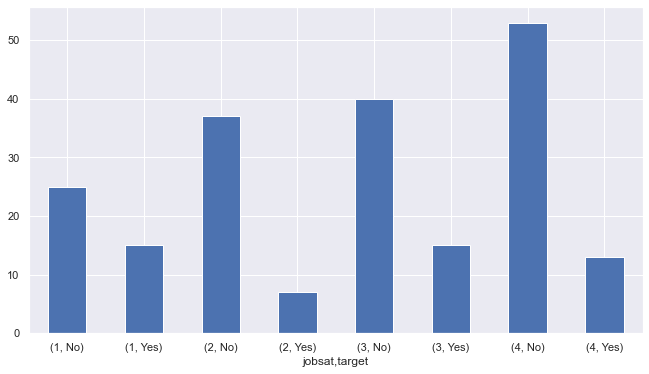

In [52]:
df1 = df.loc[df.role == 'Laboratory Technician', :]
stats_involve = df1.groupby(['jobsat', 'target']).count().loc[:, 'travel']
stats_involve_df = round(pd.DataFrame(stats_involve / stats_involve.groupby(level=0).sum() * 100), 2)
stats_involve_df.rename({'travel':'value (%)'}, axis = 1, inplace = True)
total_involve_df = pd.concat([pd.DataFrame(stats_involve), stats_involve_df], axis = 1)
total_involve_df.rename({'travel':'value'}, axis = 1, inplace = True)
print('Laboratory Technician')
display(total_involve_df)
df1.groupby(['jobsat', 'target']).count().loc[:, 'age'].plot(kind = 'bar', rot = 0);

Ярко выраженная проблема заметна конкретно с Sales Representative, а именно самые серьезные показатели по усталости, и это видно на соответствующем графике. По таблице 'Pivot table of Job role and Attrition' можно посмотреть на ситуацию в целом и проследить, на каких должностях сотрудникам тяжелее всего.

### Job satisfaction

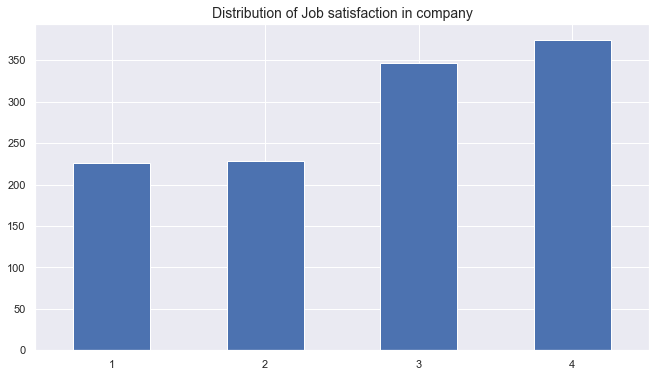

In [53]:
df.jobsat.value_counts().sort_index().plot(kind = 'bar', rot = 0)
plt.title('Distribution of Job satisfaction in company', size = 14);

In [54]:
stats_jobsat = df.groupby(['jobsat', 'target']).count().loc[:, 'travel']
stats_jobsat_df = round(pd.DataFrame(stats_jobsat / stats_jobsat.groupby(level=0).sum() * 100), 2)
stats_jobsat_df.rename({'travel':'value (%)'}, axis = 1, inplace = True)
total_jobsat_df = pd.concat([pd.DataFrame(stats_jobsat), stats_jobsat_df], axis = 1)
total_jobsat_df.rename({'travel':'value'}, axis = 1, inplace = True)
print('Pivot table of Job satisfaction and Attrition')
display(total_jobsat_df)

Pivot table of Job satisfaction and Attrition


value  value (%)
jobsat target                  
1      No        175      77.43
       Yes        51      22.57
2      No        190      83.33
       Yes        38      16.67
3      No        290      83.57
       Yes        57      16.43
4      No        330      88.00
       Yes        45      12.00

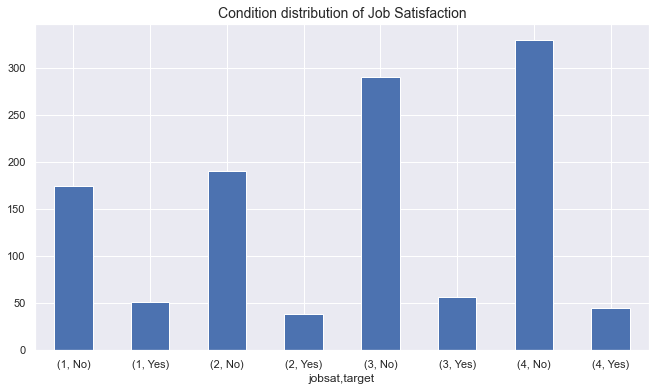

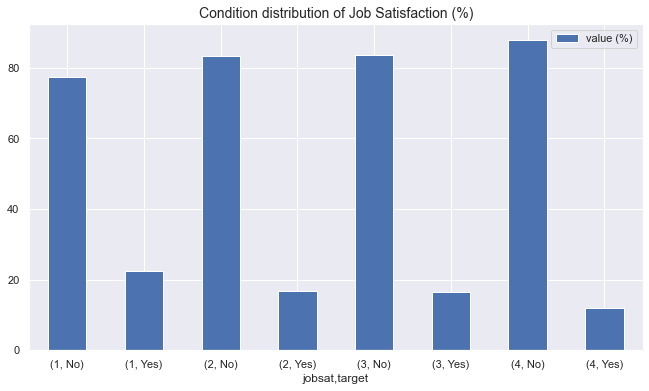

In [55]:
df.groupby(['jobsat', 'target']).count().loc[:, 'age'].plot(kind = 'bar', rot = 0);
plt.title('Condition distribution of Job Satisfaction', size = 14);
total_jobsat_df.drop('value', axis = 1).plot(kind = 'bar', rot = 0);
plt.title('Condition distribution of Job Satisfaction (%)', size = 14);

Здорово, что неудовлетворенных (1) работой меньше, чем удовлетворенных (2-4). Однако 
1. Таких сотрудников все равно достаточно много от общего количества (почти 25%)
2. С увеличением интереса к работе заметно улучшение по показателю Attriction, однако не такое существенное, чтобы оно могло полностью объяснить этот признак. Это может быть связано либо с проблемой bias data, либо с тем, что на мораль работников влияют в том числе и другие факторы. Например, уровень зарплаты, отношения с руководством и т.д.

### Marital Status

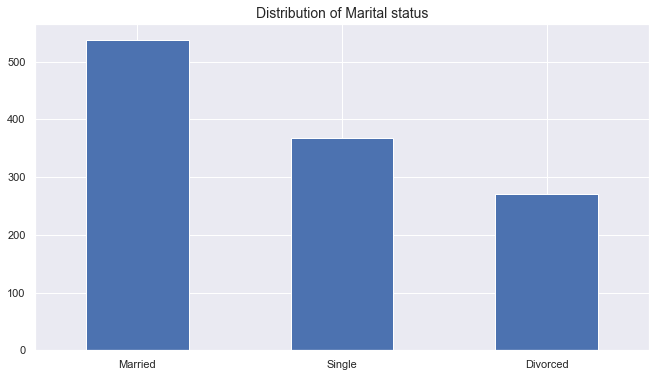

In [56]:
df.marital.value_counts().plot(kind = 'bar', rot = 0)
plt.title('Distribution of Marital status', size = 14);

In [57]:
stats_marital = df.groupby(['marital', 'target']).count().loc[:, 'travel']
stats_marital_df = round(pd.DataFrame(stats_marital / stats_marital.groupby(level=0).sum() * 100), 2)
stats_marital_df.rename({'travel':'value (%)'}, axis = 1, inplace = True)
total_maritalt_df = pd.concat([pd.DataFrame(stats_marital), stats_marital_df], axis = 1)
total_maritalt_df.rename({'travel':'value'}, axis = 1, inplace = True)
print('Pivot table of Marital status and Attrition')
display(total_maritalt_df)

Pivot table of Marital status and Attrition


value  value (%)
marital  target                  
Divorced No        242      89.63
         Yes        28      10.37
Married  No        464      86.25
         Yes        74      13.75
Single   No        279      75.82
         Yes        89      24.18

Судя по полученным данным, одинокие люди чаще других выгорают на работе, что в принципе вполне объяснимо.

### Monthly income

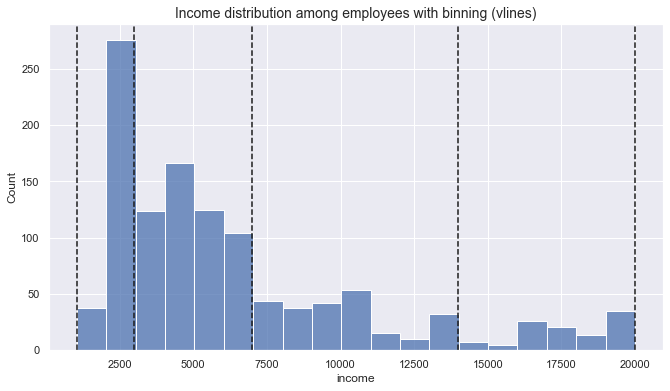

In [58]:
bins = [min(df.income.values)-1, 3000, 7000, 14000, 20000]
for xc in bins:
    plt.axvline(x=xc, color='k', linestyle='--')
sns.histplot(data = df.income)
plt.title('Income distribution among employees with binning (vlines)', size = 14);

Дискретизируем данные по аналогии с возрастом и расстоянием до дома (на рисунке выше показано разбиение).

In [59]:
cats_income, bins_income = pd.cut(df.income.values, bins = bins, 
                    labels = ['1', '2', '3', '4'], retbins = True)
df.income = cats_income

In [60]:
stats_income = df.groupby(['income', 'target']).count().loc[:, 'travel']
stats_income_df = round(pd.DataFrame(stats_income / stats_income.groupby(level=0).sum() * 100), 2)
stats_income_df.rename({'travel':'value (%)'}, axis = 1, inplace = True)
total_income_df = pd.concat([pd.DataFrame(stats_income), stats_income_df], axis = 1)
total_income_df.rename({'travel':'value'}, axis = 1, inplace = True)
print('Pivot table of Monthly Income and Attrition')
display(total_income_df)

Pivot table of Monthly Income and Attrition


value  value (%)
income target                  
1      No        222      71.61
       Yes        88      28.39
2      No        461      88.31
       Yes        61      11.69
3      No        198      83.90
       Yes        38      16.10
4      No        104      96.30
       Yes         4       3.70

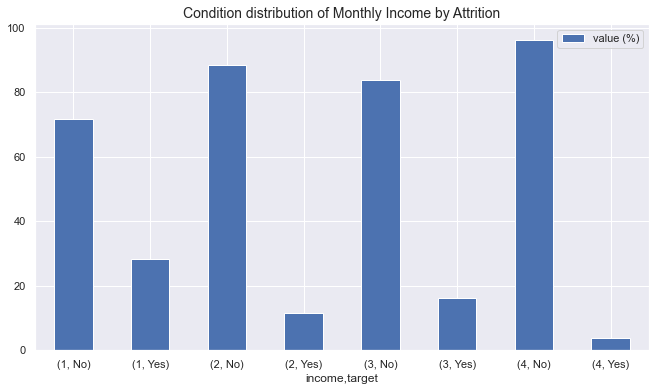

In [61]:
total_income_df.drop('value', axis = 1).plot(kind = 'bar', rot = 0);
plt.title('Condition distribution of Monthly Income by Attrition', size = 14);

Полученные значения в общем вписываются в логику "чем больше зарабатываешь, тем больше доволен", может быть за исключением 3 группы.

# Если продолжить подобным образом,
рассматривая в основном 3 аналитики:
1. Распределение признака
2. Условное распределение относительно Attrition
3. График условного распределения <br>

можно продолжить находить инсайты помимо тех, что мы уже нашли выше. К сожалению, я не могу сейчас оформить от начала и до конца то, что я хотел сделать изначально, потому что есть необходимость в работе над личными проектами и учебой, а сделать менее качественно, но целиком, мне бы не хотелось.

# Что мы сделаем
уже в самом конце, на последнем издыхании. 

В самом начале мы разбили датасет на обучающую и тестовую выборки. Используем их для машинки.
1. Обработаем имеющиеся данные с помощью энкодеров.
2. С помощью обучающейся выборки на основе решетчатого поиска с кроссс-валидацией построим следующие модели: knk, logistic regression, decision tree, random forest и naive bayes.
3. Поскольку нам лучше ошибиться в прогнозе, чем недоглядеть, то будем максимизировать метрику полноты (recall).

In [62]:
cols = df.columns[14:]
df.drop(cols, axis = 1, inplace = True)
test_df.drop(cols, axis = 1, inplace = True)

In [63]:
df.target = ['0' if value == 'No' else '1' for value in df.target]
test_df.target = ['0' if value == 'No' else '1' for value in test_df.target]

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1).values, df.target.values, 
                                                    test_size=0.8, random_state = 21)

In [65]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
      ('onehot',
      OneHotEncoder(), [0, 2-1, 5-1, 7-1, 8-1, 9-1, 11-1, 13-1]),
      ('ordinal',
      OrdinalEncoder(), [4-1, 6-1, 10-1, 12-1]),
      ('scaler',
      StandardScaler(), [3-1])])

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [66]:
from sklearn import set_config
set_config(display='diagram')
ct

ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                 [0, 1, 4, 6, 7, 8, 10, 12]),
                                ('ordinal', OrdinalEncoder(), [3, 5, 9, 11]),
                                ('scaler', StandardScaler(), [2])])

In [67]:
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [68]:
knk = KNeighborsClassifier()

Strat_KFold = StratifiedKFold(n_splits=10, random_state = 42, shuffle = True) 

n_neighbors = [1, 2, 4, 8, 10, 12, 14, 16, 18, 25, 40, 45]
p = [1, 2, 3, 4, 6, 7, 8, 10, 12]
weights = ['uniform', 'distance']

params = {'n_neighbors': n_neighbors, "p":p, "weights":weights}

grid = GridSearchCV(knk, params, scoring='recall', n_jobs=-1, 
                    cv=Strat_KFold, return_train_score=True)
grid.fit(X_train, y_train)

print("----------------- Обучили и тестировали (knk) -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя точность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Точность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))

----------------- Обучили и тестировали (knk) -------------------
Наилучшие параметры:
{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}

Средняя точность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.220000

Точность для наилучшей модели на тестовом наборе: 0.260000



In [69]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
grid1 = GridSearchCV(logreg, param_grid, n_jobs=-1, scoring = 'recall', 
                    cv=Strat_KFold)

grid1.fit(X_train, y_train)

print("----------------- Обучили и тестировали (logistic regression) -------------------")
print("Наилучшие параметры:\n{}\n".format(grid1.best_params_))
print("Средняя точность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid1.best_score_)) 
print("Точность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid1.score(X_test, y_test)))

----------------- Обучили и тестировали (logistic regression) -------------------
Наилучшие параметры:
{'C': 31.622776601683793}

Средняя точность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.275000

Точность для наилучшей модели на тестовом наборе: 0.200000



In [70]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [1,2,5,10, 50],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini']
}

grid2 = GridSearchCV(estimator=rfc, param_grid=param_grid, n_jobs=-1, scoring = 'recall', 
                    cv=Strat_KFold)

grid2.fit(X_train, y_train)

print("----------------- Обучили и тестировали (rangom forest) -------------------")
print("Наилучшие параметры:\n{}\n".format(grid2.best_params_))
print("Средняя точность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid2.best_score_)) 
print("Точность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid2.score(X_test, y_test)))

----------------- Обучили и тестировали (rangom forest) -------------------
Наилучшие параметры:
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 1}

Средняя точность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.195000

Точность для наилучшей модели на тестовом наборе: 0.133333



In [71]:
dtc = DecisionTreeClassifier(random_state=42)
tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20],
              'splitter': ['best','random']}


grid3 = GridSearchCV(estimator=dtc, param_grid=tree_param, n_jobs=-1, scoring = 'recall', 
                    cv=Strat_KFold)

grid3.fit(X_train, y_train)

print("----------------- Обучили и тестировали (Decision Tree) -------------------")
print("Наилучшие параметры:\n{}\n".format(grid3.best_params_))
print("Средняя точность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid3.best_score_)) 
print("Точность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid3.score(X_test, y_test)))

----------------- Обучили и тестировали (Decision Tree) -------------------
Наилучшие параметры:
{'criterion': 'gini', 'max_depth': 9, 'splitter': 'best'}

Средняя точность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.340000

Точность для наилучшей модели на тестовом наборе: 0.280000



In [72]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
grid4 = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, cv=Strat_KFold, n_jobs=-1,
                    scoring = 'recall')
grid4.fit(X_train, y_train)

print("----------------- Обучили и тестировали (Naive Bayes) -------------------")
print("Наилучшие параметры:\n{}\n".format(grid4.best_params_))
print("Средняя точность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid4.best_score_)) 
print("Точность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid4.score(X_test, y_test)))

----------------- Обучили и тестировали (Naive Bayes) -------------------
Наилучшие параметры:
{'var_smoothing': 8.111308307896873e-08}

Средняя точность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.950000

Точность для наилучшей модели на тестовом наборе: 0.926667



**Проверим, что мы сможем сделать на тестовой выборке, а именно**

# Classification report, Confusion matrix & Recall score

In [73]:
test_df.age = pd.cut(test_df.age.values, bins = bins_age, 
                    labels = ['1', '2', '3', '4', '5'])
test_df.travel = [word[7:] if 'Travel_' in word else word for word in test_df.travel]
test_df.travel = test_df.travel.astype('category')
test_df.drop(['hrate', 'mrate'], axis = 1, inplace = True)
test_df.dist = pd.cut(test_df.dist.values, bins = bins_dist, 
                    labels = ['1', '2', '3'])
test_df.drop('id', axis = 1, inplace = True)
test_df.envsat[test_df.envsat == 1] = 0
test_df.envsat[[any([value == 2, value == 3, value == 4]) for value in test_df.envsat]] = 1
test_df.envsat = test_df.envsat.astype('category')
test_df.drop('gender', axis = 1, inplace=True)
test_df.income = pd.cut(test_df.income.values, bins = bins_income, 
                    labels = ['1', '2', '3', '4'])
test_df.drop('education', axis=1, inplace = True)
test_df.dropna(inplace = True)

In [74]:
y_test = le.transform(test_df.target.values)

X_test = ct.transform(test_df.drop('target', axis=1).values)

### Knn classifier

Classification report

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       248
           1       0.26      0.24      0.25        45

    accuracy                           0.78       293
   macro avg       0.56      0.56      0.56       293
weighted avg       0.77      0.78      0.77       293

Confusion matrix



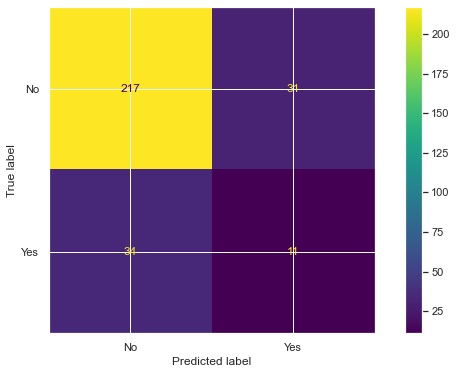

Recall score is 0.24444444444444444


In [75]:
y_pred = grid.predict(X_test)
print('Classification report\n')
print(classification_report(y_test, y_pred))
print('Confusion matrix\n')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=['No', 'Yes']);
disp.plot()
plt.show()
print('Recall score is {}'.format(recall_score(y_test, y_pred)))

### Logistic regression

Classification report

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       248
           1       0.52      0.27      0.35        45

    accuracy                           0.85       293
   macro avg       0.70      0.61      0.63       293
weighted avg       0.82      0.85      0.83       293

Confusion matrix



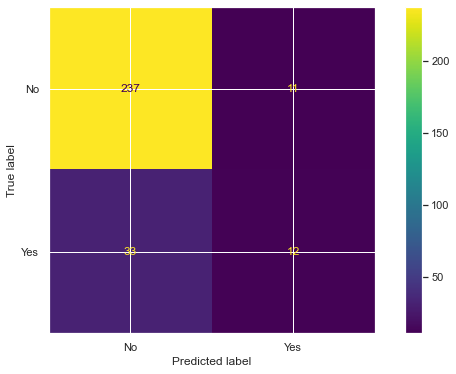

Recall score is 0.26666666666666666


In [76]:
y_pred = grid1.predict(X_test)
print('Classification report\n')
print(classification_report(y_test, y_pred))
print('Confusion matrix\n')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=['No', 'Yes']);
disp.plot()
plt.show()
print('Recall score is {}'.format(recall_score(y_test, y_pred)))

### Random Forest

Classification report

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       248
           1       0.34      0.24      0.29        45

    accuracy                           0.81       293
   macro avg       0.61      0.58      0.59       293
weighted avg       0.79      0.81      0.80       293

Confusion matrix



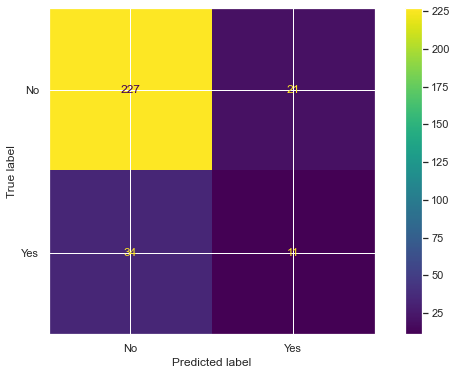

Recall score is 0.24444444444444444


In [77]:
y_pred = grid2.predict(X_test)
print('Classification report\n')
print(classification_report(y_test, y_pred))
print('Confusion matrix\n')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=['No', 'Yes']);
disp.plot()
plt.show()
print('Recall score is {}'.format(recall_score(y_test, y_pred)))

### Decision Tree

Classification report

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       248
           1       0.34      0.38      0.36        45

    accuracy                           0.79       293
   macro avg       0.61      0.62      0.62       293
weighted avg       0.80      0.79      0.80       293

Confusion matrix



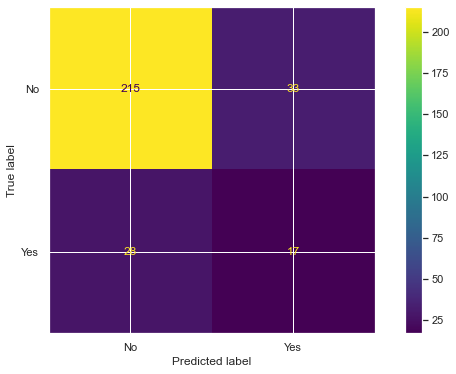

Recall score is 0.37777777777777777


In [78]:
y_pred = grid3.predict(X_test)
print('Classification report\n')
print(classification_report(y_test, y_pred))
print('Confusion matrix\n')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=['No', 'Yes']);
disp.plot()
plt.show()
print('Recall score is {}'.format(recall_score(y_test, y_pred)))

### Naive Bayes

Classification report

              precision    recall  f1-score   support

           0       0.96      0.26      0.41       248
           1       0.19      0.93      0.31        45

    accuracy                           0.37       293
   macro avg       0.57      0.60      0.36       293
weighted avg       0.84      0.37      0.40       293

Confusion matrix



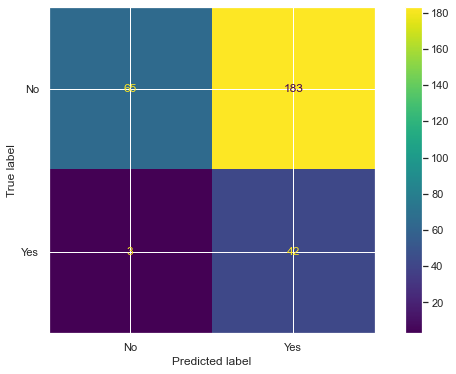

Recall score is 0.9333333333333333


In [79]:
y_pred = grid4.predict(X_test)
print('Classification report\n')
print(classification_report(y_test, y_pred))
print('Confusion matrix\n')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=['No', 'Yes']);
disp.plot()
plt.show()
print('Recall score is {}'.format(recall_score(y_test, y_pred)))

_Итог_: мы смогли, используя только половину данных (половину полей мы "дропнули", потому что не стали их обрабатывать), получить **>90% полноты**, то есть мы имеем модель, которая в среднем позволяет нам находить 90 из 100 морально и физически уставших сотрудников, что наверное неплохо. В этом нам помог наивный Байес, которому мы скормили практически только категориальные данные.

# Важно отметить

Все, что сделано выше, можно было бы сделать и лучше. Мы не проверяли предпосылки, которые по-хорошему стоило бы проверять и не использовали сильные и слабые стороны различных моделей. Помимо этого мы не использовали эконометрику (МНК и другие модели). Думаю, что если все сделать в лучшем виде, можно попытаться добиться полноты на уровне -> 1. Но это уже другая история :)

Спасибо за внимание!